# Week 5 - Missing Data

In [1]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_232"; OpenJDK Runtime Environment (build 1.8.0_232-8u232-b09-0ubuntu1~19.04.1-b09); OpenJDK 64-Bit Server VM (build 25.232-b09, mixed mode)
  Starting server from /home/megan/Projects/h2oclass/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8d6309wg
  JVM stdout: /tmp/tmp8d6309wg/h2o_megan_started_from_python.out
  JVM stderr: /tmp/tmp8d6309wg/h2o_megan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_megan_apg71u
H2O cluster total nodes:,1
H2O cluster free memory:,1.520 Gb
H2O cluster total cores:,3
H2O cluster allowed cores:,3
H2O cluster status:,"accepting new members, healthy"


In [3]:
# import the airlines data again
data = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
# split the data
train, valid, test = data.split_frame([0.8,0.1], seed=69)

In [5]:
train.describe()

Rows:35255
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-56.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.483165508439,1.4064104382357108,14.584002269181694,3.819741880584325,1346.660947451068,1313.8833640618345,1505.6385925018815,1485.912806694091,,820.9546447312438,,124.77907993703009,124.95562868815239,114.4538812785392,9.370853011486245,10.049931660220372,,,729.723665162226,5.38020368054314,14.176641357748952,0.024620621188483904,,0.0024110055311303362,3.945627802690573,0.31586322869955114,4.713565022421537,0.018497757847533637,7.56109865470851,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3948.0,,451.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,285.0,201.0,323.0,14.0,373.0,,
sigma,6.336133399053755,1.8688562189965314,9.169051694229854,1.9106929912141295,465.2889932126702,476.1801378642373,484.0922645749466,492.548930763573,,778.5843238476255,,73.96937479892875,73.34759994323755,69.72373724308498,30.092219695702365,26.628358637440808,,,577.9693297930754,4.261275831771775,9.88814656838973,0.15496814958037275,,0.04904345836226381,15.455063616587742,4.801746416155396,18.247371783397135,0.42939606485567877,23.65009281413596,,
zeros,0,0,0,0,0,460,0,460,,0,,0,0,0,1216,5166,,,0,488,437,34387,,35170,5874,7062,5931,7120,5727,,
missing,0,0,0,0,868,0,953,0,0,0,27,953,7,13355,953,868,0,0,26,12867,12865,0,7801,0,28119,28119,28119,28119,28119,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


## Examine Carrier Delay

In [6]:
# note when there are no values for a year, we get NaN
train.group_by('Year').mean(col='CarrierDelay', na='rm').get_frame().as_data_frame()

,Year,mean_CarrierDelay
0,1987,NaN
1,1988,NaN
2,1989,NaN
3,1990,NaN
4,1991,NaN
5,1992,NaN
6,1993,NaN
7,1994,NaN
8,1995,NaN
9,1996,NaN


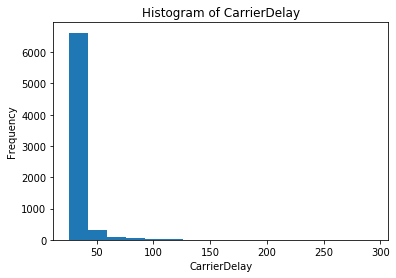

In [7]:
# shape of the data
train['CarrierDelay'].hist()

In [8]:
# very unbalanced - most have no values
train['CarrierDelay'].table()

CarrierDelay,Count
0,5874
1,45
2,44
3,54
4,48
5,50
6,52
7,50
8,53
9,59


In [9]:
# very long tail in the delays
train['CarrierDelay'].table().tail()

CarrierDelay,Count
186,1
192,2
200,1
220,1
249,1
254,1
266,1
277,1
282,1
285,1


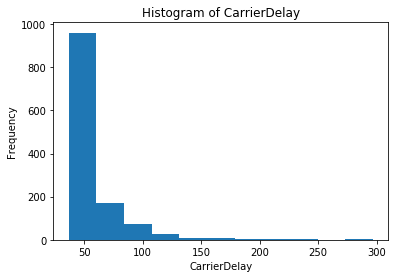

In [10]:
train[train['CarrierDelay'] >= 1, 'CarrierDelay'].hist()

In [11]:
# is this correlated with fields we have values for?
train['CarrierDelay'].cor(train['DepDelay'], na_rm=True)

0.5214790427185322

## Build a model for CarrierDelay

Now we will build a model to try to repair CarrierDelay.

In [12]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [13]:
y = 'CarrierDelay'
ignore_fields = ['TailNum']
x = [i for i in train.names if i not in ignore_fields]

In [14]:
bad_rowsT = train[y].isna()
bad_rowsV = valid[y].isna()

In [15]:
# good has values for CarrierDelay, bad is missing values
train_good = train[bad_rowsT.logical_negation(), :]
valid_good = valid[bad_rowsV.logical_negation(), :]
train_bad = train[bad_rowsT, :]
valid_bad = valid[bad_rowsV, :]

In [16]:
print("Good values: train = %d/%d, valid = %d/%d" % 
      (train_good.nrow, train_bad.nrow+train_good.nrow, valid_good.nrow, valid_bad.nrow+valid_good.nrow))

Good values: train = 7136/35255, valid = 911/4272


In [17]:
m_GBM_g = H2OGradientBoostingEstimator(distribution='gamma')
m_GBM_g.train(x, y, train_good, validation_frame=valid_good)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [18]:
# use floor to get integers to match rest of data
new_values = m_GBM_g.predict(train_bad).floor()

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [19]:
new_values.columns = [y]

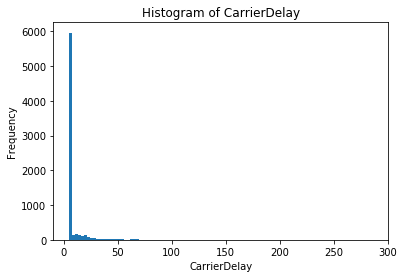

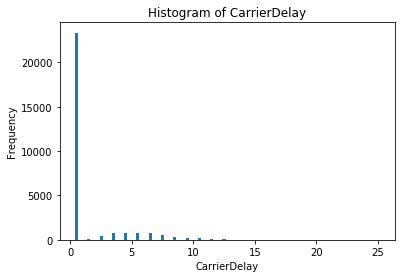

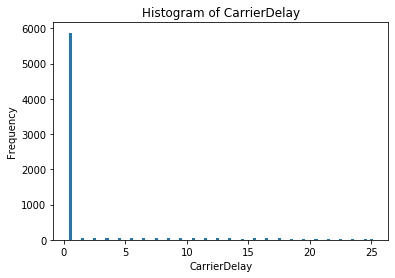

In [20]:
train_good[y].hist(100)
new_values.hist(100)
train_good[train_good[y]<=25, y].hist(100)

In [21]:
train_good[y].describe()

Rows:7136
Cols:1




,CarrierDelay
type,int
mins,0.0
mean,3.945627802690573
maxs,285.0
sigma,15.455063616587742
zeros,5874
missing,0
0,0.0
1,0.0
2,0.0


In [22]:
new_values.describe()

Rows:28119
Cols:1




,CarrierDelay
type,int
mins,0.0
mean,0.8930971940680739
maxs,25.0
sigma,2.2248159878655906
zeros,23350
missing,0
0,3.0
1,0.0
2,3.0


In [23]:
train_bad[y] = new_values

In [24]:
train2 = train_good.rbind(train_bad)

In [25]:
# check before and after the missing values dealt with for CarrierDelay
train.describe()
train2.describe()

Rows:35255
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-56.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.483165508439,1.4064104382357108,14.584002269181694,3.819741880584325,1346.660947451068,1313.8833640618345,1505.6385925018815,1485.912806694091,,820.9546447312438,,124.77907993703009,124.95562868815239,114.4538812785392,9.370853011486245,10.049931660220372,,,729.723665162226,5.38020368054314,14.176641357748952,0.024620621188483904,,0.0024110055311303362,3.945627802690573,0.31586322869955114,4.713565022421537,0.018497757847533637,7.56109865470851,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3948.0,,451.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,285.0,201.0,323.0,14.0,373.0,,
sigma,6.336133399053755,1.8688562189965314,9.169051694229854,1.9106929912141295,465.2889932126702,476.1801378642373,484.0922645749466,492.548930763573,,778.5843238476255,,73.96937479892875,73.34759994323755,69.72373724308498,30.092219695702365,26.628358637440808,,,577.9693297930754,4.261275831771775,9.88814656838973,0.15496814958037275,,0.04904345836226381,15.455063616587742,4.801746416155396,18.247371783397135,0.42939606485567877,23.65009281413596,,
zeros,0,0,0,0,0,460,0,460,,0,,0,0,0,1216,5166,,,0,488,437,34387,,35170,5874,7062,5931,7120,5727,,
missing,0,0,0,0,868,0,953,0,0,0,27,953,7,13355,953,868,0,0,26,12867,12865,0,7801,0,28119,28119,28119,28119,28119,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


Rows:35255
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-56.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.4831655084402,1.4064104382357123,14.584002269181731,3.819741880584329,1346.6609474510713,1313.8833640618238,1505.6385925018915,1485.912806694091,,820.9546447312448,,124.77907993702999,124.95562868815273,114.453881278539,9.370853011486222,10.049931660220382,,,729.7236651622262,5.380203680543146,14.17664135774899,0.024620621188483904,,0.0024110055311303362,1.5109629839739074,0.31586322869955147,4.713565022421537,0.018497757847533634,7.56109865470851,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3948.0,,451.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,285.0,201.0,323.0,14.0,373.0,,
sigma,6.3361333990532245,1.8688562189965305,9.169051694229836,1.9106929912141355,465.2889932126695,476.18013786423774,484.0922645749465,492.548930763574,,778.5843238476238,,73.96937479892884,73.3475999432376,69.72373724308511,30.092219695702436,26.628358637440805,,,577.969329793074,4.261275831771766,9.888146568389702,0.15496814958037275,,0.04904345836226381,7.334473801936143,4.80174641615539,18.247371783397135,0.429396064855679,23.65009281413596,,
zeros,0,0,0,0,0,460,0,460,,0,,0,0,0,1216,5166,,,0,488,437,34387,,35170,29224,7062,5931,7120,5727,,
missing,0,0,0,0,868,0,953,0,0,0,27,953,7,13355,953,868,0,0,26,12867,12865,0,7801,0,0,28119,28119,28119,28119,0,0
0,2004.0,1.0,12.0,1.0,623.0,630.0,901.0,915.0,UA,462.0,N805UA,98.0,105.0,80.0,-14.0,-7.0,ORD,CLT,599.0,7.0,11.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,NO,NO
1,2004.0,1.0,13.0,2.0,621.0,630.0,911.0,915.0,UA,462.0,N851UA,110.0,105.0,78.0,-4.0,-9.0,ORD,CLT,599.0,16.0,16.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,NO,NO
2,2004.0,1.0,14.0,3.0,633.0,630.0,920.0,915.0,UA,462.0,N436UA,107.0,105.0,88.0,5.0,3.0,ORD,CLT,599.0,4.0,15.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,YES,YES


In [26]:
# could then fix the valid and test data